### Importing libraries

In [1]:
import pandas as pd
import warnings
# Ignore the SettingWithCopyWarning
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

# Path to the directory containing the CSV files
directory = r"C:\Users\vksna\Documents\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

# List to store the DataFrames from each CSV file
dfs = []


# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame and append it to the list
        file_path = os.path.join(directory, filename)
        dfs.append(pd.read_csv(file_path))

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head(1000)

# Now we can use combined_df for further analysis or processing


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
995,177504,USB-C Charging Cable,1,11.95,04/10/19 14:39,"19 Cedar St, Boston, MA 02215"
996,177505,ThinkPad Laptop,1,999.99,04/30/19 16:04,"823 Johnson St, Seattle, WA 98101"
997,177506,iPhone,1,700,04/02/19 07:46,"656 Pine St, Los Angeles, CA 90001"
998,177506,Apple Airpods Headphones,1,150,04/02/19 07:46,"656 Pine St, Los Angeles, CA 90001"


In [3]:
combined_df.duplicated().sum()

1162

In [4]:
# Dropping duplicates
combined_df.drop_duplicates(inplace=True)


In [5]:
combined_df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [6]:
combined_df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [7]:
#dropping NaN values
combined_df.dropna(inplace=True)


In [8]:
combined_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df = combined_df.copy()

In [10]:
df = df[df['Order ID'] != 'Order ID']

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Reading numerical columns as object so need to change the data types of the columns

In [12]:
df[['Order ID', 'Quantity Ordered']] = df[['Order ID', 'Quantity Ordered']].astype('int32')


In [13]:
df['Price Each'] = df['Price Each'].astype(float)

In [14]:
# COnverting 'Order Date' to Datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Add Month Column

In [17]:
df['Month'] = df['Order Date'].dt.month

In [18]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### Add Sales Column

In [19]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a city column

In [21]:
City = df['Purchase Address'].str.split(',').str[1].str.strip()
State = df['Purchase Address'].str.split(',').str[2].str.split().str[0]

#### There are 2  named Portland in different states so taking states also into the consideration.

In [22]:
City_State = City + ' ' + State
print(type(City_State))

<class 'pandas.core.series.Series'>


In [23]:
df['City_State'] = City_State

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [25]:
print(df['City_State'].unique())

['Dallas TX' 'Boston MA' 'Los Angeles CA' 'San Francisco CA' 'Seattle WA'
 'Atlanta GA' 'New York City NY' 'Portland OR' 'Austin TX' 'Portland ME']


#### Question 1- What was the best month for sales? How much was earned that month?

In [26]:
result = df.groupby(['Month']).sum()
result

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1420152202,10893,1810924.81,1821413.16
2,1868278508,13431,2186940.38,2200078.08
3,2560592045,16979,2789084.64,2804973.35
4,3383299164,20536,3366218.76,3389217.98
5,3343056791,18653,3133134.61,3150616.23
6,2928868159,15234,2560503.50,2576280.15
7,3280010744,16054,2631225.12,2646461.32
8,2894980432,13429,2226963.90,2241083.37
9,2944144303,13091,2081897.65,2094465.69


In [27]:
import matplotlib.pyplot as plt

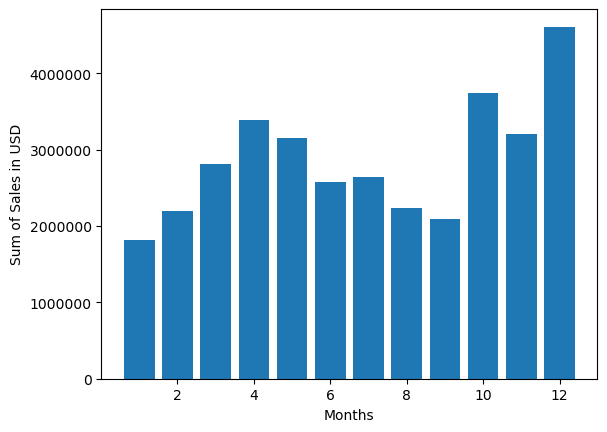

In [28]:
plt.bar(result.index, result['Sales'])
import matplotlib.ticker as mticker
formatter = mticker.FormatStrFormatter('%.f')  # Format as millions
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Months')
plt.ylabel('Sum of Sales in USD')
plt.show()

#### Question 2- What city has the highest number of sales?

In [29]:
result2 = df.groupby('City_State').sum()

In [30]:
result2

,Order ID,Quantity Ordered,Price Each,Month,Sales
City_State,,,,,
Atlanta GA,3419484721,16584,2778608.69,104649,2794199.07
Austin TX,2277506240,11137,1808340.03,69720,1818044.33
Boston MA,4590961337,22494,3634398.40,140898,3658627.65
Dallas TX,3410206282,16707,2750026.38,104447,2765373.96
Los Angeles CA,6801454376,33247,5417171.70,208020,5448304.28
New York City NY,5729940452,27903,4632920.54,175557,4661867.14
Portland ME,562382774,2746,446752.36,17119,449321.38
Portland OR,2302544477,11291,1859836.44,70517,1870010.56
San Francisco CA,10287205330,50169,8204001.38,314949,8254743.55


In [31]:
Cities = df['City_State'].unique()
print(Cities)

['Dallas TX' 'Boston MA' 'Los Angeles CA' 'San Francisco CA' 'Seattle WA'
 'Atlanta GA' 'New York City NY' 'Portland OR' 'Austin TX' 'Portland ME']


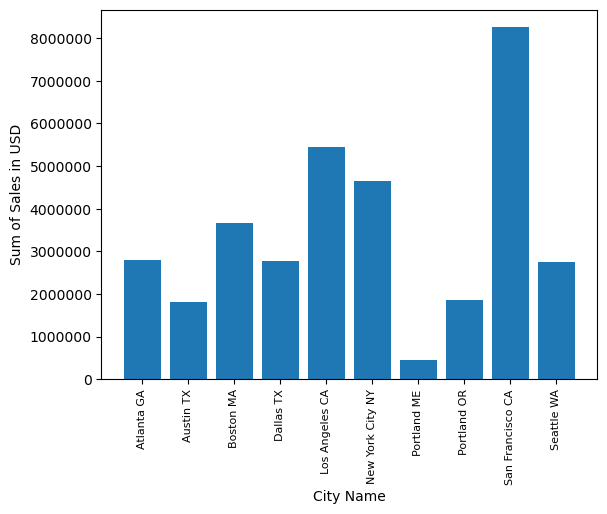

In [32]:

plt.bar(result2.index, result2['Sales'])
#import matplotlib.ticker as mticker
#formatter = mticker.FormatStrFormatter('%.f')  # Format as millions
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(Cities,rotation = "vertical",size = 8)
plt.xlabel('City Name')
plt.ylabel('Sum of Sales in USD')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [34]:
#Converting 'Order Date' to datetime object to extract the hours from it.
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [35]:
#Extracting hours from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour


In [36]:
Order_per_hour = df.groupby('Hour').size()
Order_per_hour

Hour
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
dtype: int64

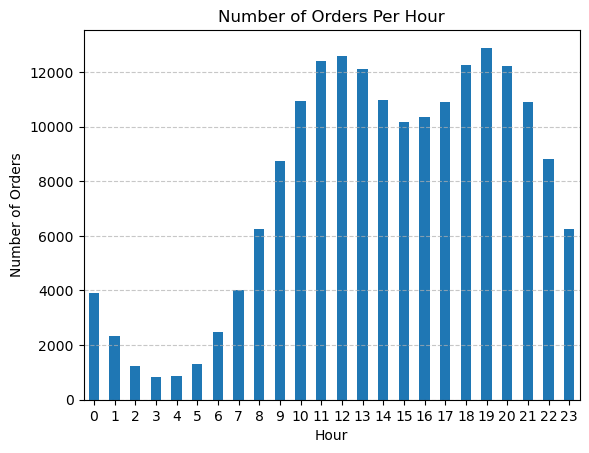

In [37]:
Order_per_hour.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Per Hour')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#####  My recommendation to display advertisement is beofre 11 am (11) or before 7 pm (19).

#### Question 4- What products are most often sold together?


In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [39]:
data = df[df['Order ID'].duplicated(keep=False)]

data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,"AAA Batteries (4-pack),Google Phone"


In [40]:
data = data[['Order ID', 'Grouped']].drop_duplicates()
data.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [46]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5- What product sold the most? Why do you think it sold the most?

In [53]:
grouped = df.groupby(['Product']).sum()
Quantity = grouped['Quantity Ordered']
grouped

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,,
20in Monitor,950247721,4126,450739.02,29319,453818.74,58729
27in 4K Gaming Monitor,1441314778,6239,2427687.75,44396,2433147.61,90841
27in FHD Monitor,1722024291,7541,1124625.02,52484,1131074.59,107422
34in Ultrawide Monitor,1417418331,6192,2346058.26,43258,2352898.08,88957
AA Batteries (4-pack),4739758630,27615,78942.72,145423,106041.60,298077
AAA Batteries (4-pack),4758103011,30986,61629.88,146149,92648.14,296904
Apple Airpods Headphones,3573531925,15637,2328750.00,109304,2345550.00,222938
Bose SoundSport Headphones,3065241918,13430,1329667.02,93918,1342865.70,192077
Flatscreen TV,1109428389,4813,1438200.00,34172,1443900.00,68719


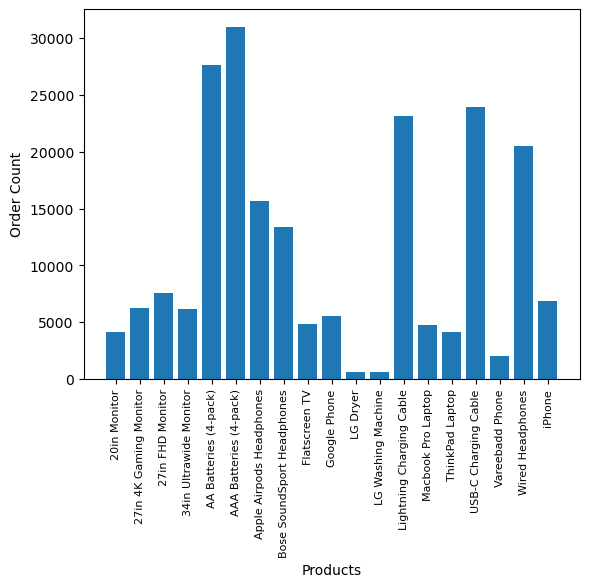

In [56]:
plt.bar(grouped.index,Quantity)
#import matplotlib.ticker as mticker
#formatter = mticker.FormatStrFormatter('%.f')  # Format as millions
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Products')
plt.ylabel('Order Count')
plt.xticks(grouped.index,rotation = "vertical",size = 8)
plt.show()

In [81]:
prices = df.groupby('Product').mean()['Price Each']

In [82]:
prices



Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

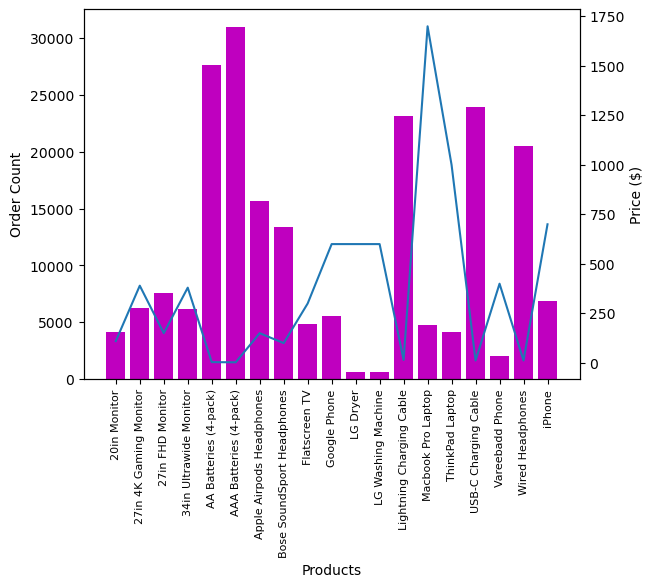

In [98]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(grouped.index,Quantity,color = 'm')
ax2.plot(prices)

ax1.set_xlabel("Products")
ax1.set_ylabel("Order Count")
ax1.tick_params(axis="y")

ax2.set_ylabel("Price ($)")
ax1.set_xticklabels(grouped.index, rotation='vertical', size=8)

fig.show()